In [1]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [2]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


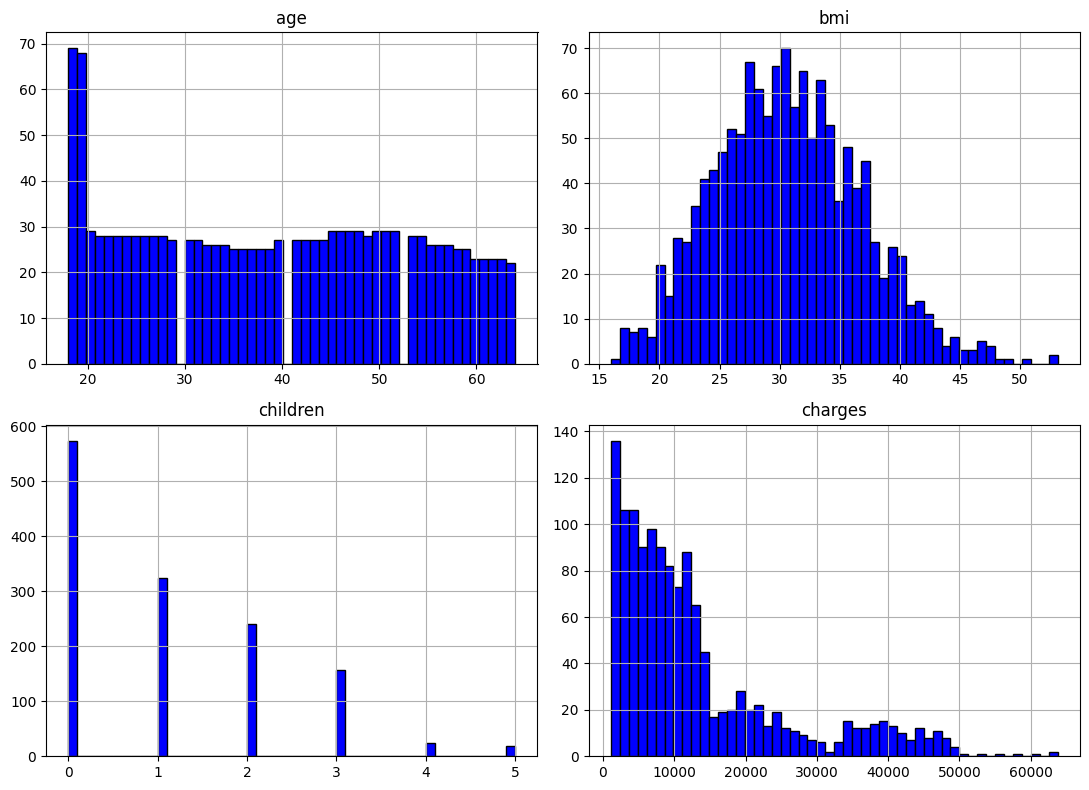

In [3]:
data.hist(figsize=(11,8),bins=50,color='blue', edgecolor='black')
plt.tight_layout()
plt.show()

Статистика для BMI:
Среднее значение: 30.66339686098655
Медиана: 30.4
Мода: 32.3
Дисперсия: 37.18788360977323
Стандартное отклонение: 6.098186911679014

Статистика для расходов (charges):
Среднее значение: 13270.422265141257
Медиана: 9382.033
Мода: 1639.5631
Дисперсия: 146652372.15285498
Стандартное отклонение: 12110.011236694001


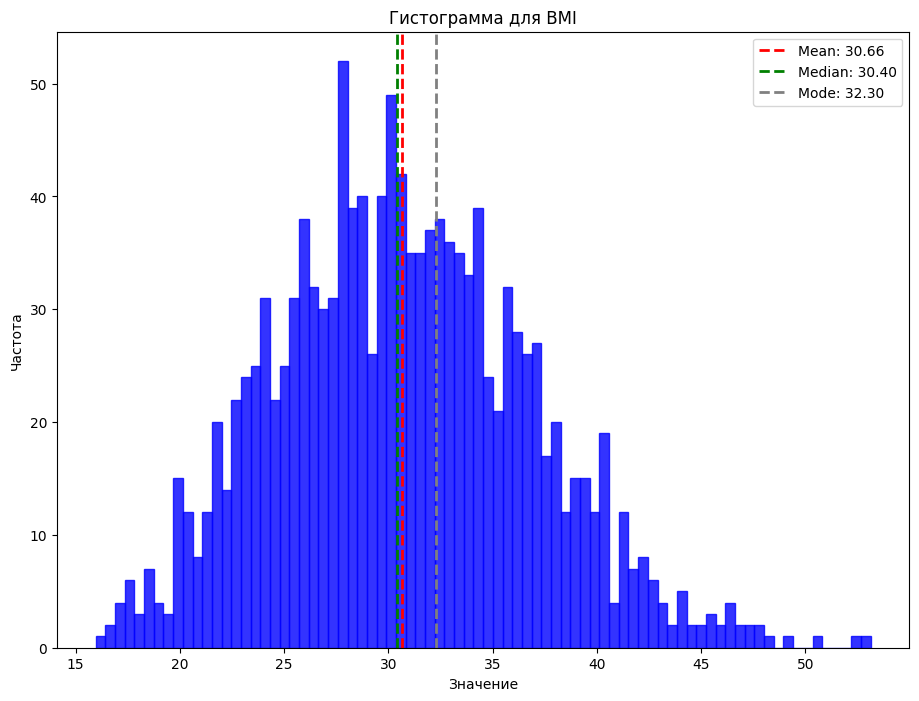

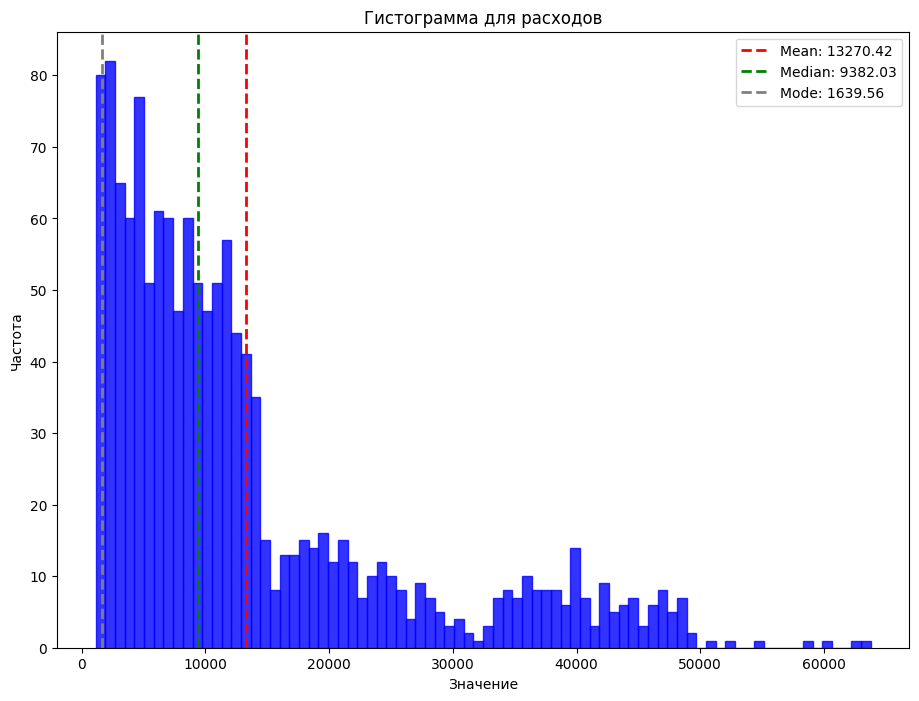

In [4]:
import numpy as np

def calculate_statistics(column):
    mean_value = column.mean()              
    median_value = column.median()          
    mode_value = column.mode()[0]           
    variance = column.var()                 
    std_dev = column.std()                   
    
    return mean_value, median_value, mode_value, variance, std_dev

bmi_mean, bmi_median, bmi_mode, bmi_variance, bmi_std = calculate_statistics(data['bmi'])
charges_mean, charges_median, charges_mode, charges_variance, charges_std = calculate_statistics(data['charges'])


print("Статистика для BMI:")
print(f"Среднее значение: {bmi_mean}")
print(f"Медиана: {bmi_median}")
print(f"Мода: {bmi_mode}")
print(f"Дисперсия: {bmi_variance}")
print(f"Стандартное отклонение: {bmi_std}")

print("\nСтатистика для расходов (charges):")
print(f"Среднее значение: {charges_mean}")
print(f"Медиана: {charges_median}")
print(f"Мода: {charges_mode}")
print(f"Дисперсия: {charges_variance}")
print(f"Стандартное отклонение: {charges_std}")


def plot_histogram_with_statistics(column, mean, median, mode, title):
    plt.figure(figsize=(11, 8))
    plt.hist(column, bins=80, color='blue', edgecolor='blue', alpha=0.8)
    plt.axvline(mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean:.2f}')
    plt.axvline(median, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median:.2f}')
    plt.axvline(mode, color='gray', linestyle='dashed', linewidth=2, label=f'Mode: {mode:.2f}')
    plt.title(title)
    plt.xlabel("Значение")
    plt.ylabel('Частота')
    plt.legend()
    plt.show()


plot_histogram_with_statistics(data['bmi'], bmi_mean, bmi_median, bmi_mode, "Гистограмма для BMI")


plot_histogram_with_statistics(data['charges'], charges_mean, charges_median, charges_mode, "Гистограмма для расходов")


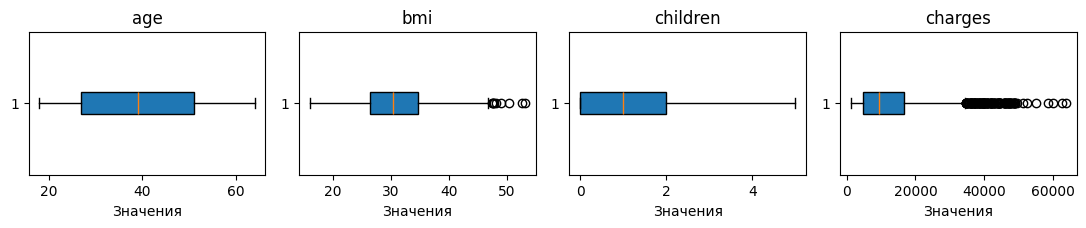

In [5]:
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(11, 8))


for i, column in enumerate(numeric_columns, 1):
    plt.subplot(4, 4, i)  
    plt.boxplot(data[column], vert=False, patch_artist=True)
    plt.title(column)
    plt.xlabel('Значения')
    
plt.tight_layout()
plt.show()


Размер выборки: 30
Среднее значение выборочных средних: 13257.28
Стандартное отклонение выборочных средних: 2158.98

Размер выборки: 50
Среднее значение выборочных средних: 13048.59
Стандартное отклонение выборочных средних: 1782.61

Размер выборки: 100
Среднее значение выборочных средних: 13236.37
Стандартное отклонение выборочных средних: 1142.62



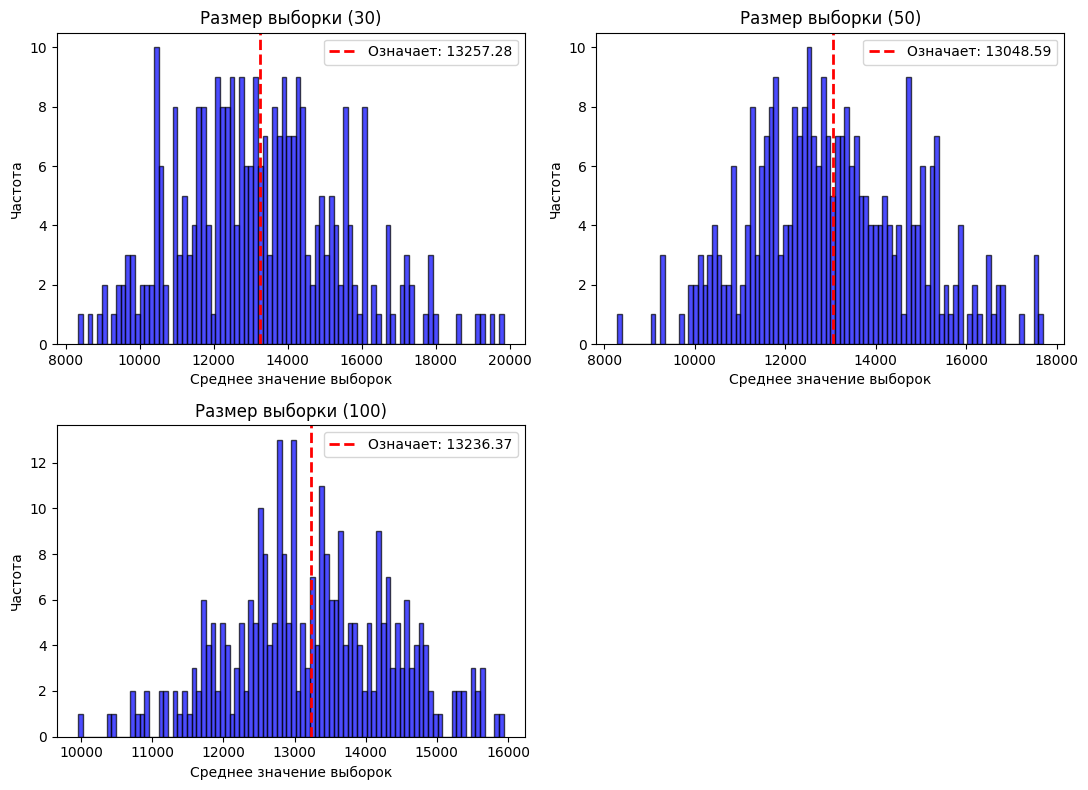

In [6]:
datas = data['charges']

def central_limit(datal, sample_size, num_samples=300):
    sample_means = []
    for _ in range(num_samples):
        sample = np.random.choice(datas, size=sample_size, replace=True)
        sample_means.append(np.mean(sample))
    return sample_means

sample_sizes = [30, 50, 100]

plt.figure(figsize=(11, 8))

for i, sample_size in enumerate(sample_sizes, 1):
    sample_means = central_limit(datas, sample_size)
    
    plt.subplot(2, 2, i)
    plt.hist(sample_means, bins=90, color='blue', edgecolor='black', alpha=0.7)
    plt.title(f'Размер выборки ({sample_size})')
    plt.xlabel("Среднее значение выборок")
    plt.ylabel('Частота')
    
    mean_of_sample_means = np.mean(sample_means)
    std_of_sample_means = np.std(sample_means)
    
    plt.axvline(mean_of_sample_means, color='red', linestyle='dashed', linewidth=2, 
                label=f'Означает: {mean_of_sample_means:.2f}')
    plt.legend()
    
    print(f"Размер выборки: {sample_size}")
    print(f"Среднее значение выборочных средних: {mean_of_sample_means:.2f}")
    print(f"Стандартное отклонение выборочных средних: {std_of_sample_means:.2f}\n")

plt.tight_layout()
plt.show()


In [7]:
from scipy import stats

def confidence_interval(data, confidence=0.95):
    n = len(data)
    mean = np.mean(data)
    std_err = np.std(data, ddof=1) / np.sqrt(n)
    h = std_err * stats.t.ppf((1 + confidence) / 2., n - 1)
    return mean, mean - h, mean + h

charges_mean, charges_ci_lower_95, charges_ci_upper_95 = confidence_interval(data['charges'], confidence=0.95)
charges_mean_99, charges_ci_lower_99, charges_ci_upper_99 = confidence_interval(data['charges'], confidence=0.99)

bmi_mean, bmi_ci_lower_95, bmi_ci_upper_95 = confidence_interval(data['bmi'], confidence=0.95)
bmi_mean_99, bmi_ci_lower_99, bmi_ci_upper_99 = confidence_interval(data['bmi'], confidence=0.99)

print(f"95% доверительный интервал для расходов (charges): {charges_ci_lower_95:.2f} - {charges_ci_upper_95:.2f}")
print(f"99% доверительный интервал для расходов (charges): {charges_ci_lower_99:.2f} - {charges_ci_upper_99:.2f}")
print(f"\n95% доверительный интервал для BMI: {bmi_ci_lower_95:.2f} - {bmi_ci_upper_95:.2f}")
print(f"99% доверительный интервал для BMI: {bmi_ci_lower_99:.2f} - {bmi_ci_upper_99:.2f}")


95% доверительный интервал для расходов (charges): 12620.95 - 13919.89
99% доверительный интервал для расходов (charges): 12416.43 - 14124.41

95% доверительный интервал для BMI: 30.34 - 30.99
99% доверительный интервал для BMI: 30.23 - 31.09


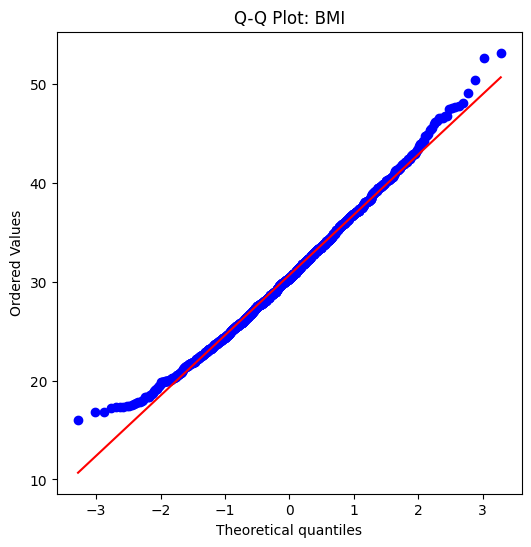

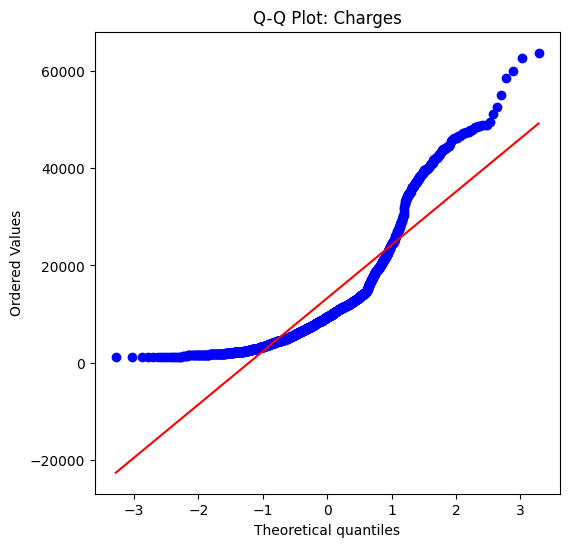

KS-тест для BMI: p-value = 0.31454
KS-тест для расходов (charges): p-value = 0.00000
Нулевая гипотеза для BMI не отклоняется: распределение является нормальным.
Нулевая гипотеза для расходов (charges) отклоняется: распределение не является нормальным.


In [8]:
bmi = data['bmi']
charges = data['charges']

def plot_qq(data, title):
    plt.figure(figsize=(6, 6))
    stats.probplot(data, dist="norm", plot=plt)
    plt.title(f"Q-Q Plot: {title}")
    plt.show()

plot_qq(bmi, 'BMI')
plot_qq(charges, 'Charges')

ks_stat_bmi, p_value_bmi = stats.kstest(bmi, 'norm', args=(np.mean(bmi), np.std(bmi)))
ks_stat_charges, p_value_charges = stats.kstest(charges, 'norm', args=(np.mean(charges), np.std(charges)))

print(f"KS-тест для BMI: p-value = {p_value_bmi:.5f}")
print(f"KS-тест для расходов (charges): p-value = {p_value_charges:.5f}")

alpha = 0.05

if p_value_bmi < alpha:
    print("Нулевая гипотеза для BMI отклоняется: распределение не является нормальным.")
else:
    print("Нулевая гипотеза для BMI не отклоняется: распределение является нормальным.")

if p_value_charges < alpha:
    print("Нулевая гипотеза для расходов (charges) отклоняется: распределение не является нормальным.")
else:
    print("Нулевая гипотеза для расходов (charges) не отклоняется: распределение является нормальным.")


In [9]:
data = pd.read_csv('ECDCCases.csv')
data.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,14/12/2020,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779
1,13/12/2020,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776
2,12/12/2020,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
3,12/12/2020,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
4,11/12/2020,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266


In [10]:
missing_values_percent = data.isnull().mean() * 100
print("Процент пропущенных значений в каждом признаке:")
print(missing_values_percent)

columns_to_drop = missing_values_percent.sort_values(ascending=False).head(2).index
data = data.drop(columns=columns_to_drop)

print(f"\nУдалены признаки: {list(columns_to_drop)}")

for column in data.columns:
    if data[column].dtype == 'object':  
        data.fillna({column: 'other'}, inplace=True)
    else:  
        data.fillna({column: data[column].median()}, inplace=True)

missing_values_after = data.isnull().sum().sum()
print(f"\nКоличество пропущенных значений после обработки: {missing_values_after}")

if missing_values_after == 0:
    print("Все пропуски успешно обработаны!")
else:
    print("Некоторые пропуски остались.")


Процент пропущенных значений в каждом признаке:
dateRep                                                       0.000000
day                                                           0.000000
month                                                         0.000000
year                                                          0.000000
cases                                                         0.000000
deaths                                                        0.000000
countriesAndTerritories                                       0.000000
geoId                                                         0.444236
countryterritoryCode                                          0.198695
popData2019                                                   0.198695
continentExp                                                  0.000000
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000    4.650750
dtype: float64

Удалены признаки: ['Cumulative_number_for_14_days_of_COVID-19_cases_per_100000', 'ge

In [11]:
data = pd.read_csv('ECDCCases.csv')  

data_stats = data.describe()
print("Статистика по данным:")
print(data_stats)


for column in data.select_dtypes(include=[float, int]):  
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    
    if not outliers.empty:
        print(f"\nПризнак '{column}' содержит выбросы.")
        print(f"Количество выбросов: {len(outliers)}")


deaths_threshold = 3000
high_death_days = data[data['deaths'] > deaths_threshold]
countries_above_threshold = high_death_days['countriesAndTerritories'].unique()

print(f"\nКоличество дней, когда число смертей превысило {deaths_threshold}: {len(high_death_days)}")
print(f"Страны, в которых количество смертей в день превысило {deaths_threshold}:")
for country in countries_above_threshold:
    days_count = len(high_death_days[high_death_days['countriesAndTerritories'] == country])
    print(f"{country}: {days_count} дней")



Статистика по данным:
                day         month          year          cases        deaths  \
count  61904.000000  61904.000000  61904.000000   61904.000000  61904.000000   
mean      15.629232      7.067104   2019.998918    1155.079026     26.053987   
std        8.841624      2.954816      0.032881    6779.010824    131.222948   
min        1.000000      1.000000   2019.000000   -8261.000000  -1918.000000   
25%        8.000000      5.000000   2020.000000       0.000000      0.000000   
50%       15.000000      7.000000   2020.000000      15.000000      0.000000   
75%       23.000000     10.000000   2020.000000     273.000000      4.000000   
max       31.000000     12.000000   2020.000000  234633.000000   4928.000000   

        popData2019  \
count  6.178100e+04   
mean   4.098628e+07   
std    1.531246e+08   
min    8.150000e+02   
25%    1.293120e+06   
50%    7.169456e+06   
75%    2.851583e+07   
max    1.433784e+09   

       Cumulative_number_for_14_days_of_COVID-19_

In [18]:
duplicates = data[data.duplicated()]
data_cleaned = data.drop_duplicates()

In [17]:
data = pd.read_csv('bmi.csv')

northwest_bmi = data[data['region'] == 'northwest']['bmi']
southwest_bmi = data[data['region'] == 'southwest']['bmi']

shapiro_nw = stats.shapiro(northwest_bmi)
shapiro_sw = stats.shapiro(southwest_bmi)

print(f"Шапиро-Уилка для northwest: статистика = {shapiro_nw.statistic}, p-value = {shapiro_nw.pvalue}")
print(f"Шапиро-Уилка для southwest: статистика = {shapiro_sw.statistic}, p-value = {shapiro_sw.pvalue}")

alpha = 0.05
if shapiro_nw.pvalue < alpha:
    print("Для региона northwest: нулевая гипотеза о нормальности распределения отклоняется.")
else:
    print("Для региона northwest: нулевая гипотеза о нормальности распределения не отклоняется.")

if shapiro_sw.pvalue < alpha:
    print("Для региона southwest: нулевая гипотеза о нормальности распределения отклоняется.")
else:
    print("Для региона southwest: нулевая гипотеза о нормальности распределения не отклоняется.")

bartlett_test = stats.bartlett(northwest_bmi, southwest_bmi)
print(f"\nБартлетт: статистика = {bartlett_test.statistic}, p-value = {bartlett_test.pvalue}")

if bartlett_test.pvalue < alpha:
    print("Нулевая гипотеза о равенстве дисперсий отклоняется.")
else:
    print("Нулевая гипотеза о равенстве дисперсий не отклоняется.")

t_test = stats.ttest_ind(northwest_bmi, southwest_bmi, equal_var=(bartlett_test.pvalue >= alpha))
print(f"\nРезультаты t-теста: статистика = {t_test.statistic}, p-value = {t_test.pvalue}")

if t_test.pvalue < alpha:
    print("Нулевая гипотеза о равенстве средних значений отклоняется.")
else:
    print("Нулевая гипотеза о равенстве средних значений не отклоняется.")


Среднее значение для northwest: 29.199784615384615
Среднее значение для southwest: 30.59661538461538

Шапиро-Уилка для northwest: статистика = 0.9954649816638332, p-value = 0.46558977988841754
Шапиро-Уилка для southwest: статистика = 0.9949269360950749, p-value = 0.36296471144781717
Для региона northwest: нулевая гипотеза о нормальности распределения не отклоняется.
Для региона southwest: нулевая гипотеза о нормальности распределения не отклоняется.

Бартлетт: статистика = 3.4000745256459286, p-value = 0.06519347353581845
Нулевая гипотеза о равенстве дисперсий не отклоняется.

Результаты t-теста: статистика = -3.2844171500398582, p-value = 0.001076958496307695
Нулевая гипотеза о равенстве средних значений отклоняется.


In [14]:
observed = [97, 98, 109, 95, 97, 104]

expected = [100, 100, 100, 100, 100, 100]

chi2_stat, p_value = stats.chisquare(f_obs=observed, f_exp=expected)

print(f"Хи-квадрат статистика: {chi2_stat}")
print(f"p-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Нулевая гипотеза отклоняется: распределение не является равномерным.")
else:
    print("Нулевая гипотеза не отклоняется: распределение является равномерным.")


Хи-квадрат статистика: 1.44
p-value: 0.9198882077437889
Нулевая гипотеза не отклоняется: распределение является равномерным.


In [15]:
data = pd.DataFrame({
    'Женат': [89, 17, 11, 43, 22, 1],
    'Гражданский брак': [80, 22, 20, 35, 6, 4],
    'Не состоит в отношениях': [35, 44, 35, 6, 8, 22]
})
data.index = ['Полный рабочий день', 'Частичная занятость', 'Временно не работает',
              'На домохозяйстве', 'На пенсии', 'Учёба']


print("Таблица данных:")
print(data)

chi2_stat, p_value, dof, expected = stats.chi2_contingency(data)

print(f"\nХи-квадрат статистика: {chi2_stat}")
print(f"p-value: {p_value}")
print(f"Степени свободы: {dof}")
print(f"Ожидаемые значения:\n{expected}")

alpha = 0.05
if p_value < alpha:
    print("\nНулевая гипотеза отклоняется: семейное положение и занятость зависимы.")
else:
    print("\nНулевая гипотеза не отклоняется: семейное положение и занятость независимы.")


Таблица данных:
                      Женат  Гражданский брак  Не состоит в отношениях
Полный рабочий день      89                80                       35
Частичная занятость      17                22                       44
Временно не работает     11                20                       35
На домохозяйстве         43                35                        6
На пенсии                22                 6                        8
Учёба                     1                 4                       22

Хи-квадрат статистика: 122.29654948595365
p-value: 1.7291616900960234e-21
Степени свободы: 10
Ожидаемые значения:
[[74.664 68.136 61.2  ]
 [30.378 27.722 24.9  ]
 [24.156 22.044 19.8  ]
 [30.744 28.056 25.2  ]
 [13.176 12.024 10.8  ]
 [ 9.882  9.018  8.1  ]]

Нулевая гипотеза отклоняется: семейное положение и занятость зависимы.
